Can you predict the top team's number of wins based on their past 2, 3, and free throw shooting performance?

Author: Micah Richardson

In [122]:
# for inline plots in notebooks (you may need them on some platforms)
%matplotlib inline
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from scipy import stats

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

#0b Change into diorectiry where data files are
%cd /content/gdrive/MyDrive/Busi488/Section002

Mounted at /content/gdrive
/content/gdrive/MyDrive/Busi488/Section002


Initial Data Exploration

Data From: https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset?select=cbb21.csv

In [6]:
df = pd.read_csv('cbb.csv')
df.head(5)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


In [35]:
df.shape

(2455, 24)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TEAM     347 non-null    object 
 1   CONF     347 non-null    object 
 2   G        347 non-null    int64  
 3   W        347 non-null    int64  
 4   ADJOE    347 non-null    float64
 5   ADJDE    347 non-null    float64
 6   BARTHAG  347 non-null    float64
 7   EFG_O    347 non-null    float64
 8   EFG_D    347 non-null    float64
 9   TOR      347 non-null    float64
 10  TORD     347 non-null    float64
 11  ORB      347 non-null    float64
 12  DRB      347 non-null    float64
 13  FTR      347 non-null    float64
 14  FTRD     347 non-null    float64
 15  2P_O     347 non-null    float64
 16  2P_D     347 non-null    float64
 17  3P_O     347 non-null    float64
 18  3P_D     347 non-null    float64
 19  ADJ_T    347 non-null    float64
 20  WAB      347 non-null    float64
 21  SEED     68 non-

In [139]:
wins = df["W"]
twopointshots = df["2P_O"]
threepointshots = df["3P_O"]
freethrows = df["FTR"]


print("2-Point Shot & Win Correlation:" + str(round(np.corrcoef(wins, twopointshots)[0][1],2)))
print("3-Point Shot & Win Correlation:" + str(round(np.corrcoef(wins, threepointshots)[0][1],2)))
print("Free throws & Win Correlation:" + str(round(np.corrcoef(wins, freethrows)[0][1],2)))

2-Point Shot & Win Correlation:0.54
3-Point Shot & Win Correlation:0.4
Free throws & Win Correlation:0.1


In [64]:
df.corr()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
G,1.000000,0.724819,0.605112,-0.607700,0.693992,0.337732,-0.472541,-0.320922,0.070594,0.256390,...,0.092973,-0.262477,0.336933,-0.429289,0.217423,-0.359390,-0.033146,0.664089,-0.587325,0.038742
W,0.724819,1.000000,0.752293,-0.693442,0.827366,0.607659,-0.593197,-0.450942,0.139757,0.284543,...,0.145325,-0.325119,0.584397,-0.524085,0.423510,-0.475145,-0.003791,0.911297,-0.649496,0.089155
ADJOE,0.605112,0.752293,1.000000,-0.483926,0.860405,0.732286,-0.294531,-0.612410,-0.135564,0.238660,...,0.108035,-0.343757,0.656954,-0.289752,0.572047,-0.186695,0.077011,0.839252,-0.745243,0.083150
ADJDE,-0.607700,-0.693442,-0.483926,1.000000,-0.837534,-0.188506,0.796335,0.170778,-0.264802,-0.300670,...,-0.112217,0.191314,-0.222889,0.737463,-0.078724,0.575623,0.224616,-0.794511,0.697441,0.092951
BARTHAG,0.693992,0.827366,0.860405,-0.837534,1.000000,0.534765,-0.616040,-0.457690,0.055207,0.303319,...,0.132977,-0.315761,0.511439,-0.579509,0.377816,-0.431773,-0.077318,0.941104,-0.826584,-0.002633
EFG_O,0.337732,0.607659,0.732286,-0.188506,0.534765,1.000000,-0.081205,-0.382608,-0.157895,-0.169523,...,-0.060295,-0.381692,0.898690,-0.069942,0.767870,-0.074900,0.134885,0.551550,-0.238978,0.235415
EFG_D,-0.472541,-0.593197,-0.294531,0.796335,-0.616040,-0.081205,1.000000,0.050050,-0.049485,-0.360943,...,-0.212508,0.098540,-0.112840,0.915149,-0.019252,0.727896,0.285777,-0.614901,0.387082,0.248482
TOR,-0.320922,-0.450942,-0.612410,0.170778,-0.457690,-0.382608,0.050050,1.000000,0.140852,0.166679,...,0.131914,0.274756,-0.314373,0.042232,-0.331216,0.043686,-0.113341,-0.456938,0.295071,-0.157255
TORD,0.070594,0.139757,-0.135564,-0.264802,0.055207,-0.157895,-0.049485,0.140852,1.000000,0.133030,...,0.076165,0.342788,-0.097024,0.003779,-0.182614,-0.130751,-0.075896,0.093859,0.008041,-0.147926
ORB,0.256390,0.284543,0.238660,-0.300670,0.303319,-0.169523,-0.360943,0.166679,0.133030,1.000000,...,0.316561,0.146962,-0.103850,-0.358273,-0.169115,-0.214153,-0.116339,0.321862,-0.289248,-0.294497


In [40]:
df.mean()

<ipython-input-40-c61f0c8f89b5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


G            31.492464
W            16.284318
ADJOE       103.304481
ADJDE       103.304603
BARTHAG       0.493957
EFG_O        49.805132
EFG_D        50.001385
TOR          18.763055
TORD         18.689572
ORB          29.875642
DRB          30.075479
FTR          35.989776
FTRD         36.269980
2P_O         48.802281
2P_D         48.976660
3P_O         34.406395
3P_D         34.598737
ADJ_T        67.812301
WAB          -7.802485
SEED          8.802521
YEAR       2016.007332
dtype: float64

In [143]:
print("Win mean:"+str(df.loc[:,"W"].mean()))
print("2 Point mean:"+str(df.loc[:,"2P_O"].mean()))
print("3 Point mean:"+str(df.loc[:,"3P_O"].mean()))
print("Free Throw mean:"+str(df.loc[:,"FTR"].mean()))

Win mean:12.060518731988473
2 Point mean:49.70201729106628
3 Point mean:33.66368876080691
Free Throw mean:31.605187319884728


Heatmaps!

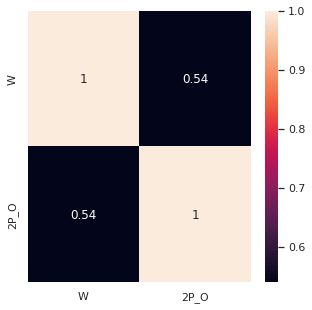

In [134]:
#Heatmap for 2-Point Shot & Wins Correlation
hmcorrelation2 = df[["W","2P_O"]].corr()
hmcorrelation2
sns.heatmap(hmcorrelation2,annot=True)

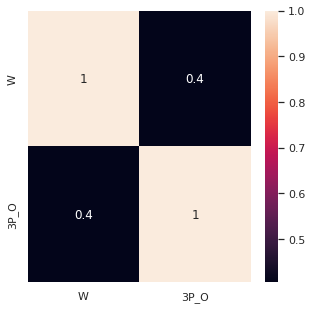

In [135]:
#Heatmap for 3-Point Shot & Wins Correlation
hmcorrelation3 = df[["W","3P_O"]].corr()
hmcorrelation3
sns.heatmap(hmcorrelation3,annot=True)

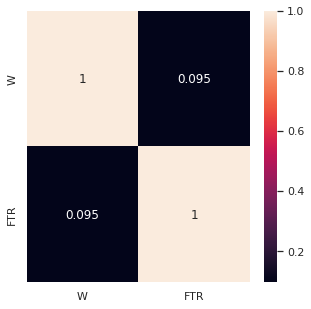

In [136]:
#Heatmap for Free Throws & Wins Correlation
hmcorrelationft = df[["W","FTR"]].corr()
hmcorrelationft
sns.heatmap(hmcorrelationft,annot=True)

Pairwise Scatter Plots

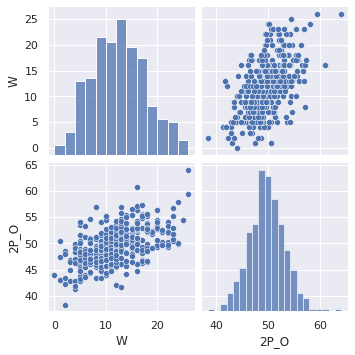

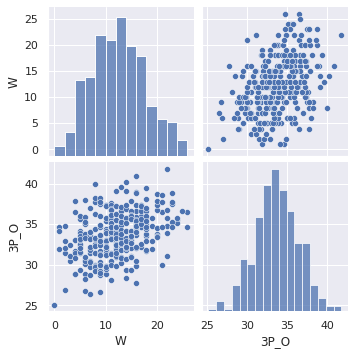

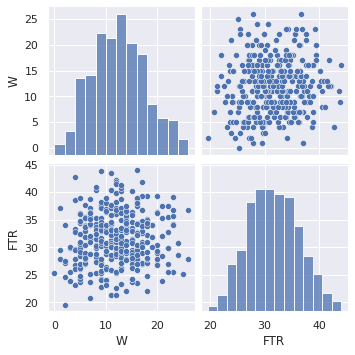

In [146]:
#Pairwise scatter plot to view relationships
sns.pairplot(df[["W","2P_O"]])
sns.pairplot(df[["W","3P_O"]])
sns.pairplot(df[["W","FTR"]])

K-Means Clustering

In [52]:
from sklearn.cluster import KMeans
# Create Kmeans model with 5 clusters
kmeans_model= KMeans(n_clusters=5,random_state=1)
#Get numeric data and remove columns with missing data
good_col = df._get_numeric_data().dropna(axis=1)
#Train the model
kmeans_model.fit(good_col)
#Get cluster label
labels = kmeans_model.labels_
labels

array([1, 1, 1, ..., 1, 1, 4], dtype=int32)

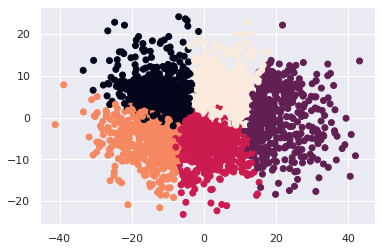

In [55]:
# Plot teams by clusters
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_col)
plt.scatter(x=plot_columns[:,0], y =plot_columns[:,1], c = labels)
plt.show()

Top Teams

In [59]:
#These teams were chosen to represent the top college basketball teams.
#Although it is objective depending who you ask, UNC was chosen because I love my school 
#& Baylor because they are the most recent tournament champions in this data set

#Find teams UNC and Baylor from the data set
UNC = good_col.loc[df["TEAM"]== "North Carolina",:]
UNC

BaylorT = good_col.loc[df["TEAM"]== "Baylor",:]
print(UNC)
print(BaylorT)


       G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB   DRB  \
0     40  33  123.3   94.9   0.9531   52.6   48.1  15.4  18.2  40.7  30.0   
9     39  33  121.0   91.5   0.9615   51.7   48.1  16.2  18.6  41.3  25.0   
2046  37  26  120.7   97.1   0.9242   52.0   50.1  16.7  16.3  37.4  25.5   
2121  34  24  113.4   94.7   0.8883   49.9   47.0  16.9  19.3  38.1  31.3   
2140  35  24  111.6   93.0   0.8902   49.3   48.0  17.2  21.5  34.6  31.6   
2399  38  26  119.6   92.5   0.9507   51.6   45.4  18.2  17.7  40.0  31.2   
2406  36  29  120.1   91.4   0.9582   52.9   48.9  17.2  18.3  35.3  22.8   

       FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  YEAR  
0     32.3  30.4  53.9  44.6  32.7  36.2   71.7   8.6  2016  
9     34.3  31.6  51.0  46.3  35.5  33.9   72.8   8.4  2017  
2046  28.0  26.0  51.0  45.3  35.9  38.0   72.6   7.1  2018  
2121  42.9  41.4  49.7  46.7  33.6  31.7   70.8   4.2  2014  
2140  28.2  27.1  46.3  46.3  37.2  34.4   71.4   2.5  2013  
2399  35.2 

In [63]:
# Convert Data into lists for Model prediction
UNC_list = UNC.values.tolist()
BaylorT_list = BaylorT.values.tolist()

#Baylor and UNC are in the same cluster 1
UNC_cluster = kmeans_model.predict(UNC_list)
BaylorT_cluster = kmeans_model.predict(BaylorT_list)

print(UNC_cluster)
print(BaylorT_cluster)

[1 1 1 1 1 1 1]
[1 1 1 1 1 1 1]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
#According to the clustering model, UNC and Baylor are both in the same cluster. This result gave me the confidence to continue with the analysis 
#as the model deems the these two teams as similar.

Linear Regression

In [176]:
#Linear regression prediction 
#dependent variable/target = Win
#Independent variable = 2P_O/3P_O/FT
#split data into 80% training, 20% testing
#Predicting the wins per team from past shooting performance 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[["2P_O"]], df[["W"]], test_size = 0.2, random_state=2)

In [177]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#Fit = train, training the model
lr.fit(x_train, y_train)
#Make predictions 
predictions = lr.predict(x_test)

print(predictions)
print(y_test)
#Predicting  Wins per team from the 2 Point shooting percentage

[[ 9.66393843]
 [10.14489415]
 [11.26712417]
 [11.1068056 ]
 [12.79015063]
 [12.62983206]
 [15.75604426]
 [11.18696489]
 [ 8.70202698]
 [11.26712417]
 [11.34728346]
 [12.22903562]
 [13.83222137]
 [12.3893542 ]
 [ 9.10282342]
 [ 8.78218627]
 [ 9.02266413]
 [10.62584988]
 [12.06871705]
 [11.98855776]
 [13.83222137]
 [12.62983206]
 [12.3893542 ]
 [14.8742921 ]
 [11.50760204]
 [11.58776132]
 [ 5.81629264]
 [ 8.70202698]
 [11.50760204]
 [ 9.50361985]
 [12.14887633]
 [12.70999135]
 [14.71397353]
 [ 9.66393843]
 [ 8.94250484]
 [11.02664631]
 [14.79413281]
 [12.79015063]
 [23.53149513]
 [ 9.50361985]
 [12.06871705]
 [ 6.6980448 ]
 [10.4655313 ]
 [11.34728346]
 [11.90839847]
 [12.22903562]
 [ 9.02266413]
 [10.14489415]
 [ 8.94250484]
 [ 5.89645193]
 [13.99253994]
 [16.55763714]
 [13.11078778]
 [ 6.53772622]
 [15.67588498]
 [ 9.1829827 ]
 [ 8.14091197]
 [11.42744275]
 [11.02664631]
 [11.82823919]
 [10.14489415]
 [ 6.61788551]
 [12.70999135]
 [10.06473486]
 [13.59174351]
 [12.14887633]
 [16.15684

Linear Regression Confidence Scores

In [178]:
#Test the model: Score returns the coefficient of determination, R^2 of the predicition 
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.330231404061592


2-Point Linear Regression confidence score: 0.330231404061592

3-Point Linear Regression confidence score: 0.06545807359020495

Free Throw Linear Regression confidence score: -0.033523703026987706

The goal was to have my linear regression scores be close to 1 and the actual results were relatively weak. One interesting takeaway is that 33.02% of the  varience for wins can be explained by a teams 2-point shooting performance.  Unfortunately, I do not have a strong enough model to predict the top teams number of wins based on their past shooting performance.

